<a href="https://colab.research.google.com/github/val93s/data_wrangling/blob/main/Copy_of_11_5_3_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.5.3 Activity

##Breast Cancer Detection

###According to the American Cancer Society:

Breast cancer is the most common cancer in American women except for skin cancer. The average risk of a woman in the United States developing breast cancer sometime in her life is about 13%. This means there is a 1 in 8 chance that she will develop breast cancer.

Mammograms are used to detect breast cancer, hopefully at an early stage; however, many masses that appear on a mammogram are not actually cancerous. Developing a machine learning model to predict whether a tumor is benign or cancerous would be helpful for physicians as they guide and treat patients. 

In the past two modules, you've worked with a subset of the measurements actually collected in this study. The entire data set contains the mean, standard deviation (SD), and *worst* value of each tumor measurement.  

These are a lot of factors, and many of them are clearly related to one another. In this activity, you will tune your previous lasso and ridge regression models to determine the best value of C: the penalty that flattens the slope of the model.

#Step 1: Download and save the `cancer_full.csv` data set from the class materials.  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `cancer_full.csv` data set by running the following code block: 

* When prompted, navigate to where you saved the `cancer_full.csv` data set on your computer. Select the file. 

In [ ]:
#Step 2

from google.colab import files
cancer_full = files.upload()

Saving cancer_full.csv to cancer_full (1).csv


#Step 3: Import necessary packages.

```
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

```

In [ ]:
#Step 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score




# Step 4: Prepare the data. 
* Run the following code block to complete all the steps to prepare the data for modeling.

In [ ]:
#Step 4

cancer_full = pd.read_csv('cancer_full.csv')

cancer_full.loc[cancer_full['diagnosis'] == 'M', 'cancer_present'] = 1
cancer_full.loc[cancer_full['diagnosis'] == 'B', 'cancer_present'] = 0

y = cancer_full['cancer_present']
X = cancer_full.drop(['id','diagnosis','cancer_present'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




#Step 5: Grid search for C in the ridge regression model.
* At the top of the code block, initialize an empty list named `cv_accuracy` to collect the mean 10-fold CV accuracy for each value of C.
* At the top of the code block, initialize a list named `C_options` containing the values `[0.01, 0.3, 0.5, 1, 2, 5, 10]`. These will be the values of C that you will try in your model. Remember that C=1 is the default.
* The for-loop will build an individual ridge regression model for each value of C and calculate the mean accuracy for 10-fold cross-validation.
* The results are stored in a list named `cv_accuracy`.


In [ ]:
#Step 5

cv_accuracy =[]
C_options =[0.01, 0.3, 0.5, 1, 2, 5, 10]

for option in C_options:
  pipe_l2     = Pipeline([('scaler', StandardScaler()), 
                      ('log_reg', LogisticRegression(random_state=0, penalty='l2', solver='liblinear', C=option))])

  pipe_l2.fit(X_train, y_train)
  
  l2_scores = cross_val_score(pipe_l2, X_train, y_train, cv=10)
  l2_cv_accuracy = l2_scores.mean()

  cv_accuracy.append(l2_cv_accuracy)




#Step 6: Plot mean accuracy for each value of C.
* Plot the value of C on the x-axis vs. the mean accuracy on the y-axis.
* There are many ways to do this including the following:

```
plt.plot(C_options, cv_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()
```

* What value of C results in the highest cross-validation accuracy?

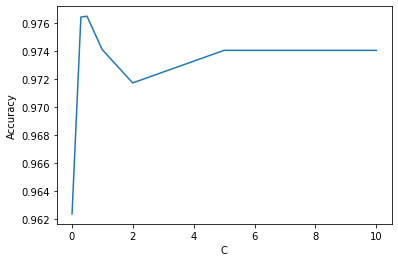

In [ ]:
#Step 6
plt.plot(C_options, cv_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()



*   **Answer:**


#Step 7: Grid search for C in the lasso regression model.
* At the top of the code block, initialize an empty list named `cv_accuracy` to collect the mean 10-fold CV accuracy for each value of C.
* At the top of the code block, initialize a list named `C_options` containing the values `[0.01, 0.3, 0.5, 1, 2, 5, 10]`. These will be the values of C that you will try in your model. Remember that C=1 is the default.
* The for-loop will build an individual lasso regression model for each value of C and calculate the mean accuracy for 10-fold cross-validation.
* The results are stored in a list named `cv_accuracy`.


In [ ]:
#Step 7

cv_accuracy =[]
C_options =[0.01, 0.3, 0.5, 1, 2, 5, 10]


for option in C_options:
  pipe_l1     = Pipeline([('scaler', StandardScaler()), 
                      ('log_reg', LogisticRegression(random_state=0, penalty='l1', solver='liblinear', C=option))])

  pipe_l1.fit(X_train, y_train)

  l1_scores = cross_val_score(pipe_l1, X_train, y_train, cv=10)
  l1_cv_accuracy = l1_scores.mean()

  cv_accuracy.append(l1_cv_accuracy)


#Step 8: Plot mean accuracy for each value of C.
* Plot the value of C on the x-axis vs. the mean accuracy on the y-axis.
* There are many ways to do this including the following:

```
plt.plot(C_options, cv_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()
```

* What value of C results in the highest cross-validation accuracy?

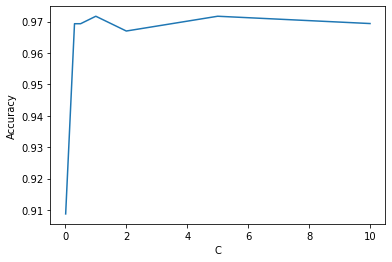

In [ ]:
#Step 8
plt.plot(C_options, cv_accuracy)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()


#Step 9: Print the 10-fold CV accuracy for both models with C=1.
* Recall that C=1 is the default.
* **Hint:** If you need help, you can select the relevant code from the for-loop and replace the value of C with 1 (or simply delete it).
* Identify the most accurate model.  Does ridge regression or lasso regresson perform the best for this data?






In [ ]:
#Step 9
pipe_l2 = Pipeline([('scaler', StandardScaler()),
                  ('log_reg', LogisticRegression(random_state=0, penalty='l2', solver='liblinear'))])

pipe_l2.fit(X_train, y_train)

l2_scores = cross_val_score(pipe_l2, X_train, y_train, cv=10)

l2_cv_accuracy =l2_scores.mean()

print('The mean 10-fold accuracy for the ridge regression model is', l2_cv_accuracy)

pipe_l1 = Pipeline([('scaler', StandardScaler()),
                  ('log_reg', LogisticRegression(random_state=0, penalty='l1', solver='liblinear'))])

pipe_l1.fit(X_train, y_train)

l1_scores = cross_val_score(pipe_l1, X_train, y_train, cv=10)

l1_cv_accuracy = l1_scores.mean()

print('The mean 10-fold CV accuracy for the lasso regression model is ', l1_cv_accuracy)

The mean 10-fold accuracy for the ridge regression model is 0.9740863787375416
The mean 10-fold CV accuracy for the lasso regression model is  0.9717054263565892


*   **Answer:**



#Step 10: Test the ridge regression model on the testing data.  
* Is the accuracy still high?






In [ ]:
#Step 10
l2_testing_accuracy = pipe_l2.score(X_test, y_test)
print('The testing accuracy for the ridge regression model is', l2_testing_accuracy)

l1_testing_accuracy = pipe_l1.score(X_test, y_test)
print('The testing accuracy for the ridge regression model is', l1_testing_accuracy)






The testing accuracy for the ridge regression model is 0.9790209790209791
The testing accuracy for the ridge regression model is 0.972027972027972


*   **Answer:**








